## **Data Analytics HW#8**
* **學號：R10546001**
* **姓名：許世佑**

### **Q1**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

In [9]:
# load data
df = pd.DataFrame(np.zeros((400, 2576)))
count = 0
for i in range(40):
    for j in range(10):
        image = Image.open("/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/ORL_Faces/" + str(i+1) + "_" + str(j+1) + ".png")
        image_array = np.array(image)
        image_array = image_array.reshape(1,-1)
        df.iloc[count] = image_array
        count += 1
df["Gender"] = np.ones((400,1))
df.iloc[0:10, 2576] = 0.0
df.iloc[70:80, 2576] = 0.0
df.iloc[90:100, 2576] = 0.0
df.iloc[310:320, 2576] = 0.0
print(df)

         0      1      2      3      4      5      6      7      8      9  \
0     88.0   88.0   90.0   91.0   91.0   92.0   90.0   93.0   99.0  109.0   
1     87.0   90.0   95.0   96.0   92.0   90.0   97.0  107.0  111.0  112.0   
2     92.0   92.0   88.0   98.0  104.0  109.0  108.0  100.0   80.0   63.0   
3     92.0   96.0   93.0   94.0   99.0  105.0  108.0  109.0  121.0  152.0   
4     83.0   75.0   88.0   91.0  101.0   90.0   86.0   80.0   63.0   58.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
395  124.0  124.0  125.0  123.0  124.0  125.0  123.0  124.0  123.0  122.0   
396  128.0  128.0  128.0  128.0  129.0  128.0  129.0  127.0  127.0  127.0   
397  122.0  123.0  124.0  124.0  123.0  123.0  122.0  126.0  130.0  126.0   
398  120.0  119.0  121.0  119.0  120.0  121.0  122.0  117.0  111.0  100.0   
399  124.0  125.0  125.0  125.0  124.0  125.0  124.0  124.0  124.0  124.0   

     ...   2567   2568   2569   2570   2571   2572   2573   2574   2575  \


In [10]:
# k-means
X = df.iloc[:,0:2576]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
warnings.filterwarnings("ignore")
kmeans_model = KMeans(n_clusters = 2)
kmeans_model.fit(X)
X["clusters"] = kmeans_model.labels_
true_label = sum(X["clusters"] == df["Gender"])
false_label = sum(X["clusters"] != df["Gender"])
print("True Labels: {}\nFalse Labels: {}".format(true_label, false_label))

True Labels: 157
False Labels: 243


Text(0, 0.5, 'False Labels')

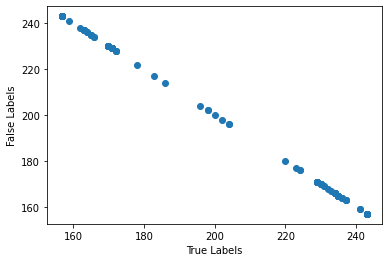

In [11]:
true_lab = []
false_lab = []
for i in range(100):
    kmeans_model = KMeans(n_clusters = 2)
    kmeans_model.fit(X)
    true_label = sum(kmeans_model.labels_ == df["Gender"])
    false_label = sum(kmeans_model.labels_ != df["Gender"])
    true_lab.append(true_label)
    false_lab.append(false_label)

plt.scatter(true_lab, false_lab)
plt.xlabel("True Labels")
plt.ylabel("False Labels")

# of True Labeling: 120
# of False Labeling: 280


Text(0, 0.5, 'False Labels')

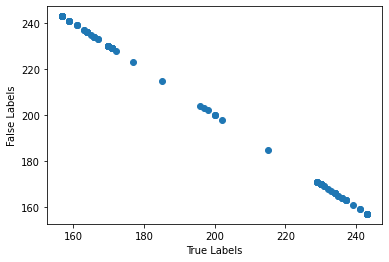

In [29]:
#hierarchical clustering
X = df.iloc[:,0:2576]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(X)
X["clusters"] = hierarchical_cluster.labels_
true_label = sum(X["clusters"] == df["Gender"])
false_label = sum(X["clusters"] != df["Gender"])
print("# of True Labeling: {}\n# of False Labeling: {}".format(true_label, false_label))

true_lab = []
false_lab = []
for i in range(100):
    kmeans_model = KMeans(n_clusters = 2)
    kmeans_model.fit(X)
    true_label = sum(kmeans_model.labels_ == df["Gender"])
    false_label = sum(kmeans_model.labels_ != df["Gender"])
    true_lab.append(true_label)
    false_lab.append(false_label)

plt.scatter(true_lab, false_lab)
plt.xlabel("True Labels")
plt.ylabel("False Labels")

### **Q2**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [31]:
col_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin",
             "car name"]

data = pd.read_csv("DA_Demo.csv")
data.columns = col_names
data = data[data["horsepower"] != "?"]
data = data.drop("car name", axis = 1)
y = data["origin"]
X = data.drop("origin", axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
#K-Means
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(X)
clusters_Kmeans = kmeans_model.labels_
true_label = sum(clusters_Kmeans == y)
false_label = sum(clusters_Kmeans != y)
print("k-means")
print("True Labels: {}\nFalse Labels: {}\n".format(true_label, false_label))

k-means
True Labels: 79
False Labels: 313



In [33]:
#Hierarchical Clustering
hierarchical_cluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(X)
clusters_HC = hierarchical_cluster.labels_
true_label = sum(clusters_HC == y)
false_label = sum(clusters_HC != y)
print("hierarchical clustering ")
print("True Labels: {}\nFalse Labels: {}\n".format(true_label, false_label))


hierarchical clustering 
True Labels: 99
False Labels: 293



In [39]:
#DBSCAN
DBSCAN_model = DBSCAN(eps=1.15, min_samples=3)
DBSCAN_model.fit(X)
clusters_DBSCAN = DBSCAN_model.labels_
no_clusters = len(np.unique(clusters_DBSCAN) )
no_noise = sum(clusters_DBSCAN == -1)
print("DBSCAN")
y_remove_noise = y[clusters_DBSCAN != -1]
clusters_DBSCAN_remove_noise = clusters_DBSCAN[clusters_DBSCAN != -1]
true_label = sum(clusters_DBSCAN_remove_noise == y_remove_noise)
false_label = sum(clusters_DBSCAN_remove_noise != y_remove_noise)
print("True Labels: {}\nFalse Labels: {}\n".format(true_label, false_label))

DBSCAN
True Labels: 140
False Labels: 244



In [36]:
#Logistic Regression
from sklearn import linear_model
logr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
logr.fit(X, y)
predicted_LR = logr.predict(X)
true_label = sum(predicted_LR == y)
false_label = sum(predicted_LR != y)
print("LR")
print("True Labels: {}\nFalse Labels: {}\n".format(true_label, false_label))

LR
True Labels: 309
False Labels: 83



In [37]:
#SVM
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)
predicted_SVM = clf.predict(X)
true_label = sum(predicted_SVM == y)
false_label = sum(predicted_SVM != y)
print("SVM")
print("True Labels: {}\nFalse Labels: {}\n".format(true_label, false_label))

SVM
True Labels: 310
False Labels: 82



In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
predicted_KNN = knn.predict(X)
true_label = sum(predicted_KNN == y)
false_label = sum(predicted_KNN != y)
print("KNN")
print("True Labels: {}\nFalse Labels: {}\n".format(true_label, false_label))

KNN
True Labels: 392
False Labels: 0

